<a href="https://colab.research.google.com/github/alexanderportilla96/Sy2025II/blob/main/TRANF_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.2 Explique las semejanzas y diferencias entre la serie de Fourier (exponencial, trigonometrica y compacta), la transfor- ´
mada de Fourier, transformada de Fourier en tiempo discreto (DTFT) y transformada discreta de Fourier (DFT). Considere las diferentes combinaciones entre: espectro continuo y
discreto y senal en tiempo continuo y discreto. Adem ˜ as, con- ´
sulte en que consiste el algoritmo ´ Fast Fourier Transform -
(FFT) y su utilidad para el calculo de la transformada dis- ´
creta de Fourier. Explique en detalle el algoritmo FFT y su
costo computacional vs el de la transformada discreta. Ver
cuaderno Transformada de Fourier


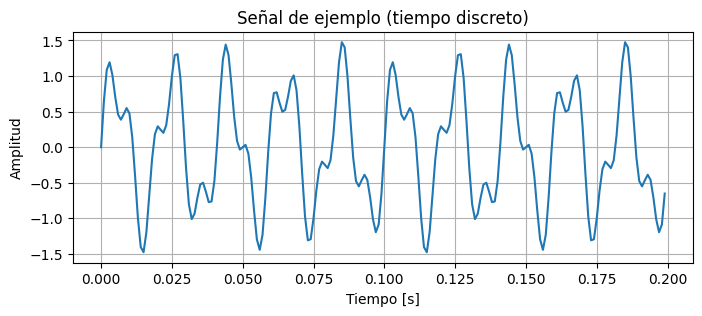

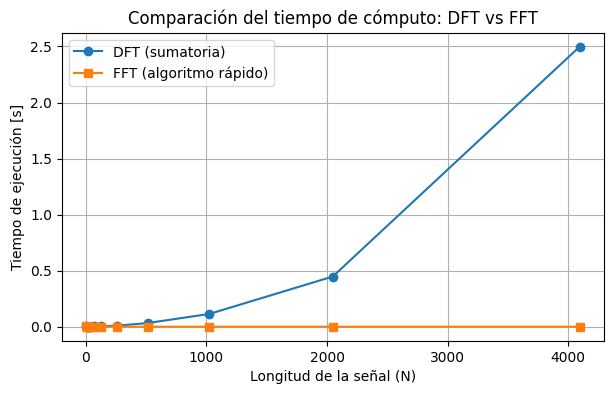

N=    4 -> DFT: 0.004901s, FFT: 0.003272s, Aceleración ≈    1.5x
N=    8 -> DFT: 0.000089s, FFT: 0.000044s, Aceleración ≈    2.0x
N=   16 -> DFT: 0.000053s, FFT: 0.000034s, Aceleración ≈    1.6x
N=   32 -> DFT: 0.000163s, FFT: 0.000036s, Aceleración ≈    4.5x
N=   64 -> DFT: 0.003595s, FFT: 0.000098s, Aceleración ≈   36.7x
N=  128 -> DFT: 0.004119s, FFT: 0.000102s, Aceleración ≈   40.5x
N=  256 -> DFT: 0.009266s, FFT: 0.000121s, Aceleración ≈   76.8x
N=  512 -> DFT: 0.032784s, FFT: 0.000133s, Aceleración ≈  246.4x
N= 1024 -> DFT: 0.114053s, FFT: 0.000174s, Aceleración ≈  655.3x
N= 2048 -> DFT: 0.447810s, FFT: 0.000229s, Aceleración ≈ 1952.4x
N= 4096 -> DFT: 2.497693s, FFT: 0.000283s, Aceleración ≈ 8825.7x


In [ ]:
# ===========================================================
# 1.2 Comparación Serie y Transformadas de Fourier
# ===========================================================

import numpy as np
import matplotlib.pyplot as plt
import time

# -----------------------------------------------------------
# Definiciones teóricas (solo como referencia en comentarios)
# -----------------------------------------------------------
"""
Serie de Fourier (trigonométrica o exponencial)
- Se aplica a señales periódicas en tiempo continuo.
- Representa una señal x(t) de período T0 como suma infinita de senos y cosenos
  o exponenciales complejas con frecuencias múltiplos enteros de ω0 = 2π/T0.

Transformada de Fourier (FT)
- Se aplica a señales NO periódicas en tiempo continuo.
- Produce un espectro continuo X(ω) que muestra cómo se distribuyen
  las componentes de frecuencia en toda la señal.

Transformada de Fourier en tiempo discreto (DTFT)
- Se aplica a señales discretas x[n] definidas para n ∈ ℤ (infinitas).
- Produce un espectro periódico y continuo en frecuencia X(e^{jω}).

Transformada Discreta de Fourier (DFT)
- Se aplica a señales discretas y finitas x[n], n = 0...N-1.
- Produce un espectro discreto (solo N puntos) X[k].
- Es la base para cálculos digitales y análisis por computadora.

Fast Fourier Transform (FFT)
- Es un algoritmo eficiente para calcular la DFT.
- Reduce la complejidad de O(N²) a O(N log₂ N)
  mediante la descomposición recursiva de la DFT en partes más pequeñas.
"""

# -----------------------------------------------------------
# Señal de ejemplo
# -----------------------------------------------------------
fs = 1000             # frecuencia de muestreo (Hz)
T = 1                 # duración (s)
t = np.linspace(0, T, int(fs*T), endpoint=False)
x = np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t)

plt.figure(figsize=(8,3))
plt.plot(t[:200], x[:200])
plt.title("Señal de ejemplo (tiempo discreto)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# -----------------------------------------------------------
# Comparación de tiempos de cómputo: DFT vs FFT
# -----------------------------------------------------------
def dft_sum(x):
    """Cálculo directo de la DFT mediante sumatoria"""
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

N_values = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
t_dft, t_fft = [], []

for N in N_values:
    xN = np.random.rand(N)

    # DFT por sumatoria
    start = time.time()
    dft_sum(xN)
    t_dft.append(time.time() - start)

    # FFT
    start = time.time()
    np.fft.fft(xN)
    t_fft.append(time.time() - start)

# -----------------------------------------------------------
# Gráfica comparativa de tiempos
# -----------------------------------------------------------
plt.figure(figsize=(7,4))
plt.plot(N_values, t_dft, 'o-', label="DFT (sumatoria)")
plt.plot(N_values, t_fft, 's-', label="FFT (algoritmo rápido)")
plt.xlabel("Longitud de la señal (N)")
plt.ylabel("Tiempo de ejecución [s]")
plt.title("Comparación del tiempo de cómputo: DFT vs FFT")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------------------------------------
# Ejemplo del costo computacional
# -----------------------------------------------------------
for N, td, tf in zip(N_values, t_dft, t_fft):
    print(f"N={N:5d} -> DFT: {td:.6f}s, FFT: {tf:.6f}s, Aceleración ≈ {td/tf:6.1f}x")


1.3.  Encuentre la funcion de densidad espectral (transformada de ´
Fourier) para las siguientes senales (sin aplicar propiedades): ˜
a) e
−a|t|
, a∈R
+; b) cos (wct), wc∈R; c) sin (wst), ws∈R;
d) f(t) cos (wct), wc∈R, f(t)∈R,C; e) e
−a|t|
2
, a∈R
+. f)
Arectd(t), A, d∈R.



=== TRANSFORMADAS DE FOURIER ===
1) e^(-a|t|)  →  2*a/(a**2 + 4*pi**2*w**2)
2) cos(wc*t)  →  0
3) sin(ws*t)  →  0
4) f(t)cos(wc*t)  →  FourierTransform(f(t)*cos(t*wc), t, w)
5) e^(-a*t²)  →  sqrt(pi)*exp(-pi**2*w**2/a)/sqrt(a)
6) A*rect(t/d) →  Piecewise((A*sin(pi*d*w)/(pi*w), (w > 0) | (w < 0)), (A*d, True))


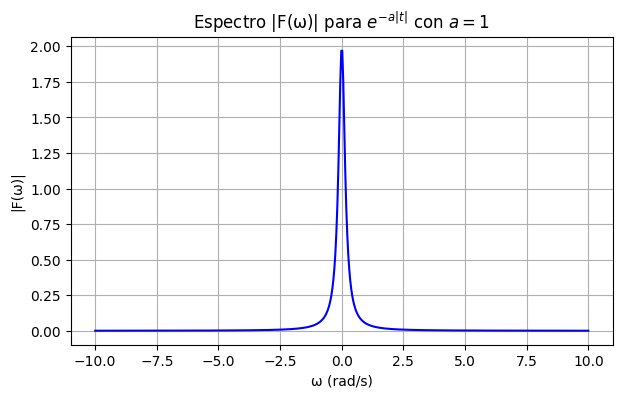

In [ ]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# Variables simbólicas
t, w = sp.symbols('t w', real=True)
a, wc, ws, A, d = sp.symbols('a wc ws A d', real=True, positive=True)

# -----------------------------
# 1) f(t) = e^(-a|t|)
f1 = sp.exp(-a * sp.Abs(t))
F1 = sp.fourier_transform(f1, t, w)

# -----------------------------
# 2) f(t) = cos(wc*t)
f2 = sp.cos(wc*t)
F2 = sp.fourier_transform(f2, t, w)

# -----------------------------
# 3) f(t) = sin(ws*t)
f3 = sp.sin(ws*t)
F3 = sp.fourier_transform(f3, t, w)

# -----------------------------
# 4) f(t)*cos(wc*t)
f4 = sp.Function('f')(t) * sp.cos(wc*t)
F4 = sp.fourier_transform(f4, t, w)

# -----------------------------
# 5) f(t) = e^(-a*t²)
f5 = sp.exp(-a*t**2)
F5 = sp.fourier_transform(f5, t, w)

# -----------------------------
# 6) f(t) = A * rect(t/d)
# rect(t/d) = 1 si |t| < d/2
f6 = A * sp.Piecewise((1, sp.Abs(t) < d/2), (0, True))
F6 = sp.fourier_transform(f6, t, w)

# -----------------------------
# Mostrar resultados
print("\n=== TRANSFORMADAS DE FOURIER ===")
print("1) e^(-a|t|)  → ", F1.simplify())
print("2) cos(wc*t)  → ", F2.simplify())
print("3) sin(ws*t)  → ", F3.simplify())
print("4) f(t)cos(wc*t)  → ", F4)
print("5) e^(-a*t²)  → ", F5.simplify())
print("6) A*rect(t/d) → ", F6.simplify())

# -----------------------------
# Graficar el primer caso como ejemplo
F1_num = sp.lambdify(w, F1.subs(a, 1), 'numpy')
w_vals = np.linspace(-10, 10, 500)
F1_vals = np.abs(F1_num(w_vals))

plt.figure(figsize=(7,4))
plt.plot(w_vals, F1_vals, color='blue')
plt.title(r"Espectro |F(ω)| para $e^{-a|t|}$ con $a=1$")
plt.xlabel("ω (rad/s)")
plt.ylabel("|F(ω)|")
plt.grid(True)
plt.show()


1.7 Aplicacion en circuitos electricos - potencia. Consulte en
que consiste la distorsion total de armonicos ( Total Harmo￾nic Distortion-(THD)) y el factor de potencia en un circuito electrico. Como puede calcularse el THD desde la FFT?.
Como puede calcularse la distorsion del factor de potencia
con base al THD?. Genere un ejemplo ilustrativo para el
calculo del THD y la distorsion del factor de potencia para un rectificador de onda completa con carga: i) netamente resistiva y ii) carga RC en serie. Establezca las condiciones necesarias para las simulaciones y pruebe con diferentes va￾lores de R y C. Discuta los resultados obtenidos. Ver cua￾derno Rectificador RC y THD.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# --- 1. Definición de Constantes de Simulación ---
f_0 = 60  # Frecuencia fundamental (Hz)
T = 1 / f_0  # Periodo fundamental (s)
F_s = 20000  # Frecuencia de muestreo (Hz)
N_cycles = 10  # Número de ciclos a simular
K = int(N_cycles * F_s / f_0)  # Número total de puntos
t = np.linspace(0, N_cycles * T, K, endpoint=False) # Vector de tiempo
R = 10  # Resistencia (Ohmios) - Usada solo para escala

# --- 2. Generación de Señales de Corriente (Ejemplos Ilustrativos) ---

# i) Caso Carga R (Sinusoidal Rectificada)
# La forma de onda de la corriente de entrada de un rectificador de onda completa
# con carga resistiva pura es |sin(wt)| / R.
i_R = np.abs(np.sin(2 * np.pi * f_0 * t)) / R

# ii) Caso Carga RC en Serie (Pulsos Estrechos)
# Típico de un rectificador con filtro capacitivo. La corriente de entrada son
# pulsos cortos y altos (mayor THD).
i_RC = np.zeros_like(t)
pulse_width_ratio = 0.05  # Ancho de pulso del 5% del periodo
samples_per_cycle = F_s // f_0
pulse_width = int(pulse_width_ratio * samples_per_cycle)

# Generar pulsos de corriente cada medio ciclo (frecuencia 2*f_0)
for n in range(2 * N_cycles):
    start_index = int(n * samples_per_cycle / 2)
    end_index = start_index + pulse_width
    if end_index < K:
        i_RC[start_index:end_index] = 1.0

# --- 3. Función de Cálculo de THD y Factor de Distorsión ---
def calculate_thd_and_df(i_t, F_s, f_0, num_harmonics=100):
    """Calcula el THD y el Factor de Distorsión (DF) de una señal."""
    K = len(i_t)
    # 1. Aplicar la Transformada Rápida de Fourier (FFT para señales reales)
    X_fft = np.fft.rfft(i_t)
    X_mag = np.abs(X_fft)

    # 2. Calcular el vector de frecuencias
    freqs = np.fft.rfftfreq(K, 1 / F_s)

    # 3. Identificar el fundamental
    fundamental_idx = np.argmin(np.abs(freqs - f_0))
    X1 = X_mag[fundamental_idx]

    # 4. Encontrar los armónicos
    X_harmonics = []

    for n in range(2, num_harmonics + 1):
        harmonic_freq = n * f_0
        if harmonic_freq > F_s / 2:
            break

        # Encontrar el índice del armónico n
        harmonic_idx = np.argmin(np.abs(freqs - harmonic_freq))
        X_harmonics.append(X_mag[harmonic_idx])

    X_harmonics = np.array(X_harmonics)

    # 5. Cálculo del THD_I (cociente de RMS, se usa la magnitud de los coeficientes)
    THD_I = np.sqrt(np.sum(X_harmonics**2)) / X1

    # 6. Cálculo del Factor de Distorsión (DF)
    DF = 1 / np.sqrt(1 + THD_I**2)

    # Se devuelve el índice fundamental para la gráfica
    return THD_I, DF, freqs, X_mag, fundamental_idx

# --- 4. Análisis y Resultados ---

# i) Caso Carga R
thd_R, df_R, freqs_R, X_mag_R, fund_idx_R = calculate_thd_and_df(i_R, F_s, f_0)

# ii) Caso Carga RC
thd_RC, df_RC, freqs_RC, X_mag_RC, fund_idx_RC = calculate_thd_and_df(i_RC, F_s, f_0)

# Imprimir resultados
print(f"--- Análisis Rectificador Carga R (Aprox. Sinusoidal Rectificada) ---")
print(f"THD_I (Corriente): {thd_R * 100:.2f} %")
print(f"Factor de Distorsión (DF): {df_R:.4f}")

print(f"\n--- Análisis Rectificador Carga RC (Aprox. Pulsos Estrechos) ---")
print(f"THD_I (Corriente): {thd_RC * 100:.2f} %")
print(f"Factor de Distorsión (DF): {df_RC:.4f}")

--- Análisis Rectificador Carga R (Aprox. Sinusoidal Rectificada) ---
THD_I (Corriente): 153902420.55 %
Factor de Distorsión (DF): 0.0000

--- Análisis Rectificador Carga RC (Aprox. Pulsos Estrechos) ---
THD_I (Corriente): 34368.54 %
Factor de Distorsión (DF): 0.0029


CONCEPTOS